In [1]:
import json as j
import pandas as pd
import re
import numpy
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

json_data = None
with open('question.json', 'r') as f:
     json_data = j.load(f)

data = pd.DataFrame(json_data)

test_data = None

with open('question.json', 'r') as f:
     test_data = j.load(f)

test_data = pd.DataFrame(test_data)


stemmer = SnowballStemmer('english')
words = stopwords.words("english")

data['cleaned'] = data['question'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
test_data['cleaned'] = test_data['question'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [78]:
import json as j
import pandas as pd
import re
import numpy
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import csv

data = pd.read_csv('iseardataset.csv')
test_data = data

stemmer = SnowballStemmer('english')
words = stopwords.words("english")

data['cleaned'] = data['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
test_data['cleaned'] = data['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

data['cleaned'][1]

'everi time i imagin someon i love i could contact serious ill even death'

In [79]:
import numpy as np
wordsList = np.load('wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
SeqLength = 42
counter = 0
for p in wordsList:
    counter = counter+1
    if counter >= SeqLength:                
        break
        
wordVectors = np.load('wordVectors.npy')

Loaded the word list!


In [80]:
labeltext = data['label']

labeltext1= data['label']


testdata = data['cleaned']

In [81]:
uniqueLabel=[]
for w in labeltext:
    if w not in uniqueLabel:
        uniqueLabel.append(w)
        
uniqueLabel

['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']

In [82]:
counter=[]
for word in uniqueLabel:
    count=0
    for word1 in labeltext:
        if word==word1:
            count=count+1
    counter.append(count)
    
sum(counter)

7516

In [83]:
list1 = data['cleaned']


len(list1)


list1[0]

'on day i feel close partner friend when i feel peac also experi close contact peopl i regard great'

In [84]:
numWords=[]
x = []
for pf in list1:
    counter = len(pf.split())
    x.append(counter)
    numWords.append(counter)

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

The total number of files is 7516
The total number of words in the files is 91532
The average number of words in the files is 12.178286322511974


In [85]:
maxSeqLength = 24

In [86]:
import tensorflow as tf
sess = tf.Session()

In [87]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [88]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0
for pf in list1:
    indexCounter = 0
    cleanedLine = cleanSentences(pf)
    split = cleanedLine.split()
    for word in split:
        try:
            ids[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    
np.save('idsMatrixQ1', ids)

In [89]:
ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
fileCounter = 0
for pf in testdata:
    indexCounter = 0
    cleanedLine = cleanSentences(pf)
    split = cleanedLine.split()
    for word in split:
        try:
            ids[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    
np.save('idsMatrixQ2', ids)

In [90]:
ids1 = np.load('idsMatrixQ1.npy')


ids1[41]


ids = np.load('idsMatrixQ2.npy')
ids[0]

ids[41]

array([    61,     41,    998,   6710, 399999,     41,  90634,    530,
           41,   2716, 399999,  86821,   1927,   1671,     79, 399999,
        11056,      0,      0,      0,      0,      0,      0,      0])

In [91]:
from random import randint
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(1,7515)
        labeltxt = labeltext[num]
        if labeltxt=="joy":
            labels.append([1,0,0,0,0,0,0])
        if labeltxt=="fear":
            labels.append([0,1,0,0,0,0,0])
        if labeltxt=="anger":
            labels.append([0,0,1,0,0,0,0])
        if labeltxt=="sadness":
            labels.append([0,0,0,1,0,0,0])
        if labeltxt=="disgust":
            labels.append([0,0,0,0,1,0,0])
        if labeltxt=="shame":
            labels.append([0,0,0,0,0,1,0])
        if labeltxt=="guilt":
            labels.append([0,0,0,0,0,0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(1,7515)
        labeltxt = labeltext1[num]
        if labeltxt=="joy":
            labels.append([1,0,0,0,0,0,0])
        if labeltxt=="fear":
            labels.append([0,1,0,0,0,0,0])
        if labeltxt=="anger":
            labels.append([0,0,1,0,0,0,0])
        if labeltxt=="sadness":
            labels.append([0,0,0,1,0,0,0])
        if labeltxt=="disgust":
            labels.append([0,0,0,0,1,0,0])
        if labeltxt=="shame":
            labels.append([0,0,0,0,0,1,0])
        if labeltxt=="guilt":
            labels.append([0,0,0,0,0,0,1])
        arr[i] = ids1[num-1:num]
    return arr, labels

In [92]:
batchSize = 64
lstmUnits = 10
numClasses = 7
iterations = 100000
numDimensions = 300

In [93]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [94]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)
data.shape

TensorShape([Dimension(64), Dimension(24), Dimension(50)])

In [141]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)
print(prediction)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
print(correctPred)
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))
print(accuracy)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

ValueError: Variable rnn/basic_lstm_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\Vinay Varekar\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\Vinay Varekar\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "C:\Users\Vinay Varekar\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


In [142]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

In [97]:
# sess = tf.InteractiveSession()
# saver = tf.train.Saver()
# sess.run(tf.global_variables_initializer())

# for i in range(iterations):
#    #Next Batch of reviews
#    nextBatch, nextBatchLabels = getTrainBatch()
#    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
#    #Write summary to Tensorboard
#    if (i % 50 == 0):
#        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
#        writer.add_summary(summary, i)

#    #Save the network every 10,000 training iterations
#    if (i % 10000 == 0 and i != 0):
#        save_path = saver.save(sess, "models1/pretrained_lstm.ckpt", global_step=i)
#        print("saved to %s" % save_path)
# writer.close()

saved to models1/pretrained_lstm.ckpt-10000
saved to models1/pretrained_lstm.ckpt-20000
saved to models1/pretrained_lstm.ckpt-30000
saved to models1/pretrained_lstm.ckpt-40000
saved to models1/pretrained_lstm.ckpt-50000
saved to models1/pretrained_lstm.ckpt-60000
saved to models1/pretrained_lstm.ckpt-70000
saved to models1/pretrained_lstm.ckpt-80000
saved to models1/pretrained_lstm.ckpt-90000


In [143]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('models1'))

INFO:tensorflow:Restoring parameters from models1\pretrained_lstm.ckpt-90000


In [152]:
iterations = 50
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    print("Accuracy for this batch:", (sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})) * 100)

Accuracy for this batch: 56.25
Accuracy for this batch: 59.375
Accuracy for this batch: 57.8125
Accuracy for this batch: 53.125
Accuracy for this batch: 60.9375
Accuracy for this batch: 54.6875
Accuracy for this batch: 64.0625
Accuracy for this batch: 68.75
Accuracy for this batch: 65.625
Accuracy for this batch: 54.6875
Accuracy for this batch: 54.6875
Accuracy for this batch: 59.375
Accuracy for this batch: 75.0
Accuracy for this batch: 53.125
Accuracy for this batch: 60.9375
Accuracy for this batch: 68.75
Accuracy for this batch: 65.625
Accuracy for this batch: 60.9375
Accuracy for this batch: 51.5625
Accuracy for this batch: 54.6875
Accuracy for this batch: 59.375
Accuracy for this batch: 57.8125
Accuracy for this batch: 51.5625
Accuracy for this batch: 50.0
Accuracy for this batch: 59.375
Accuracy for this batch: 64.0625
Accuracy for this batch: 50.0
Accuracy for this batch: 65.625
Accuracy for this batch: 56.25
Accuracy for this batch: 50.0
Accuracy for this batch: 68.75
Accuracy

In [145]:
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

def getSentenceMatrix(sentence):
    arr = np.zeros([batchSize, maxSeqLength])
    sentenceMatrix = np.zeros([batchSize,maxSeqLength], dtype='int32')
    cleanedSentence = cleanSentences(sentence)
    split = cleanedSentence.split()
    for indexCounter,word in enumerate(split):
        try:
            sentenceMatrix[0,indexCounter] = wordsList.index(word)
        except ValueError:
            sentenceMatrix[0,indexCounter] = 399999 #Vector for unkown words
    return sentenceMatrix

In [146]:
inputText = "When I was not accepted as a student in finance and accounting."
inputMatrix = getSentenceMatrix(inputText)

In [147]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
max1 = 0
count = 0
for i in range(0,6):
    if predictedSentiment[max1] < predictedSentiment[i]:
        max1 = i
        count = predictedSentiment[i]

print(max1,count)
print(uniqueLabel[max1])
predictedSentiment

1 2.6381736
fear


array([ 0.31307772,  2.6381736 , -1.40887   , -0.36780676,  0.7357974 ,
       -1.0194211 ,  0.07250335], dtype=float32)

In [135]:
inputText = "When one lets friends down"
inputMatrix = getSentenceMatrix(inputText)

In [136]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
max1 = 0
count = 0
for i in range(0,6):
    if predictedSentiment[max1] < predictedSentiment[i]:
        max1 = i
        count = predictedSentiment[i]

print(max1,count)
print(uniqueLabel[max1])
predictedSentiment

3 0.57973254
sadness


array([ 0.17515756, -0.5884043 , -0.58662677,  0.57973254,  0.43536714,
        0.01479686, -0.09924237], dtype=float32)

In [137]:
inputText = "When the whole family gets together for a one week holiday."
inputMatrix = getSentenceMatrix(inputText)

In [138]:
predictedSentiment = sess.run(prediction, {input_data: inputMatrix})[0]
max1 = 0
count = 0
for i in range(0,6):
    if predictedSentiment[max1] < predictedSentiment[i]:
        max1 = i
        count = predictedSentiment[i]

print(max1,count)
print(uniqueLabel[max1])
predictedSentiment

1 0.9278729
fear


array([ 0.2347897 ,  0.9278729 , -0.7285969 ,  0.27474755,  0.62038076,
       -0.24732117,  0.1686889 ], dtype=float32)

In [153]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [155]:
# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [158]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [160]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [162]:
predictions[0:5]

array([123.94912283, 178.75109307,  58.732693  , 120.32302802,
       189.18183373])

Text(0,0.5,'Predictions')

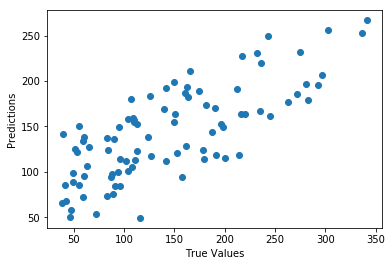

In [164]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [165]:
print("Score:", model.score(X_test, y_test))

Score: 0.5690116201581218


In [166]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [169]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


In [170]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [171]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\Vinay Varekar\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [174]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

ValueError: Found input variables with inconsistent numbers of samples: [442, 2]